In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2022-12-17 11:09:54--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.62.44
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.62.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  13.7MB/s    in 12s     

2022-12-17 11:10:07 (12.1 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [ ]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

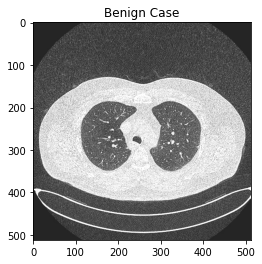

In [ ]:
img = cv2.imread("Lung_cancer_dataset/Train/Benign cases/Bengin case (106).jpg" )
plt.title("Benign Case")
plt.imshow(img)

In [ ]:
img_width = 45
img_height = 45

In [ ]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")


Found 970 images belonging to 3 classes.
Found 107 images belonging to 3 classes.


In [ ]:
train_data_generator.next()[1]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32,activation="relu"))


model.add(Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 43, 43, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 32)          18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 32)        

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]

In [ ]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 7s 108ms/step - loss: 0.9534 - accuracy: 0.5031 - val_loss: 0.9593 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 6s 103ms/step - loss: 0.8189 - accuracy: 0.6268 - val_loss: 1.0230 - val_accuracy: 0.4766
Epoch 3/50
61/61 [==============================] - 6s 105ms/step - loss: 0.6003 - accuracy: 0.7711 - val_loss: 1.0233 - val_accuracy: 0.4579
Epoch 4/50
61/61 [==============================] - 6s 104ms/step - loss: 0.4455 - accuracy: 0.8289 - val_loss: 1.1138 - val_accuracy: 0.5514
Epoch 5/50
61/61 [==============================] - 6s 106ms/step - loss: 0.3069 - accuracy: 0.8835 - val_loss: 0.9795 - val_accuracy: 0.5794
Epoch 6/50
61/61 [==============================] - 7s 106ms/step - loss: 0.2443 - accuracy: 0.9062 - val_loss: 1.2804 - val_accuracy: 0.5234
Epoch 7/50
61/61 [==============================] - 6s 105ms/step - loss: 0.1812 - accuracy: 0.9330 - val_loss: 0.9121 - val_accuracy: 0.6636
Epoch 

In [ ]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Test", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")

Found 20 images belonging to 3 classes.


In [ ]:
test_data_generator.next()[1]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

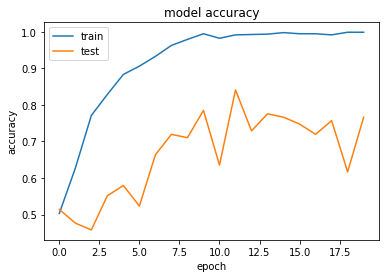

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

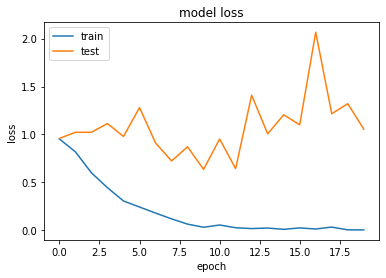

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(10):
    img = x[i]
    img = img.reshape(-1,img_width,img_height,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)


1/1 [==============================] - 0s 15ms/step


In [ ]:
cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:10]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Benign', 1: 'Benign', 2: 'Malignant', 3: 'Normal', 4: 'Benign', 5: 'Malignant', 6: 'Normal', 7: 'Normal', 8: 'Malignant', 9: 'Benign'}
PREDICTIONS: {0: 'Malignant', 1: 'Benign', 2: 'Malignant', 3: 'Normal', 4: 'Benign', 5: 'Malignant', 6: 'Normal', 7: 'Normal', 8: 'Malignant', 9: 'Benign'}


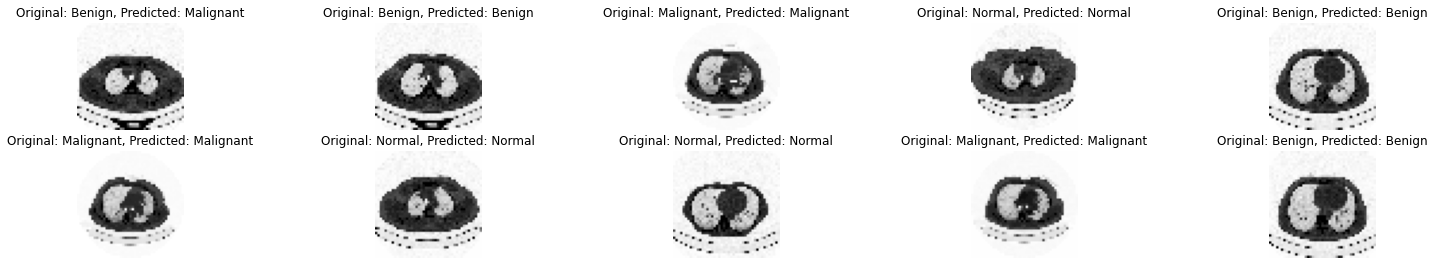

In [ ]:
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(10,5,i+1)
    plt.imshow(x[i].squeeze(), cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()

In [ ]:
model.save("lung_cancer_prediction.h5")